In [1]:
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.datasets import make_s_curve
# PyTorch
import torch

In [2]:
import sys
sys.path.append('../src/')

%load_ext autoreload
%autoreload 2
# Importing our custom module(s)
import layers

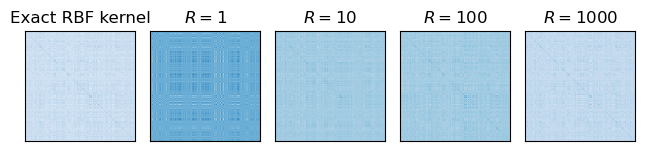

In [3]:
fig, axes = plt.subplots(1, 5)
X, t = make_s_curve(1000, noise=0.1, random_state=42)
K = rbf_kernel(X, gamma=1/2)
axes[0].imshow(K, cmap=plt.cm.Blues)
axes[0].set_xticks([])
axes[0].set_yticks([])
axes[0].set_title('Exact RBF kernel')
for i, R in enumerate([1, 10, 100, 1000]):
    model = layers.RandomFeatureGaussianProcess(in_features=3, out_features=1, lengthscale=1.0, rank=R)
    h = model.featurize(torch.tensor(X, dtype=torch.float32)).detach().numpy()
    axes[i+1].imshow(h@h.T, cmap=plt.cm.Blues)
    axes[i+1].set_xticks([])
    axes[i+1].set_yticks([])
    axes[i+1].set_title(rf'$R={R}$')
fig.tight_layout()
plt.show()